# <font size="7"> **Assignment-7**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np


# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 14

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


Train samples : 2100
Val samples   : 900
Epoch   0 | Train Loss: 0.6941 | Val Loss: 0.6939
Epoch 100 | Train Loss: 0.6866 | Val Loss: 0.6881
Epoch 200 | Train Loss: 0.6809 | Val Loss: 0.6838
Epoch 300 | Train Loss: 0.6765 | Val Loss: 0.6806
Epoch 400 | Train Loss: 0.6731 | Val Loss: 0.6784
Epoch 500 | Train Loss: 0.6705 | Val Loss: 0.6767
Epoch 600 | Train Loss: 0.6685 | Val Loss: 0.6755
Epoch 700 | Train Loss: 0.6669 | Val Loss: 0.6747


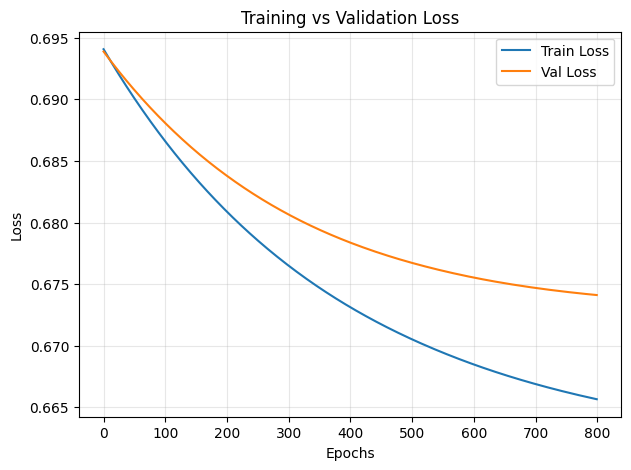

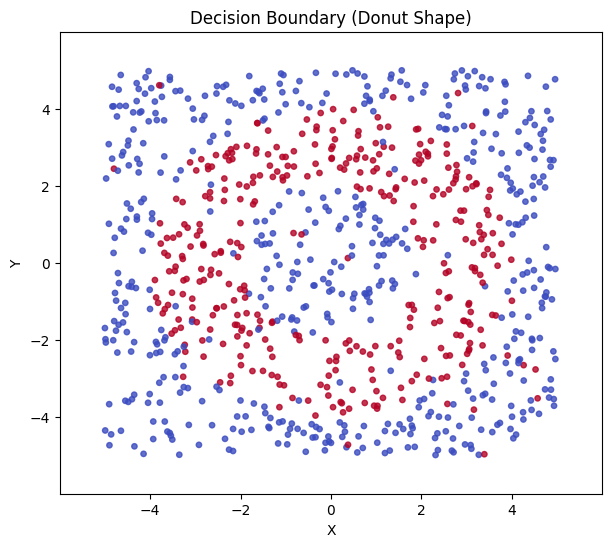

In [ ]:


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_full,
    y_full,
    test_size=0.3,
    random_state=GROUP_NUMBER
)

# quick sanity check
print("Train samples :", X_train.shape[0])
print("Val samples   :", X_val.shape[0])


# Model parameters (weights and biases)
W1 = torch.randn(2, 16) * 0.1
W1.requires_grad_()

b1 = torch.zeros(16, requires_grad=True)

W2 = torch.randn(16, 16) * 0.1
W2.requires_grad_()
b2 = torch.zeros(16, requires_grad=True)


W3 = torch.randn(16, 16) * 0.1
W3.requires_grad_()
b3 = torch.zeros(16, requires_grad=True)

W4 = torch.randn(16, 1) * 0.1
W4.requires_grad_()
b4 = torch.zeros(1, requires_grad=True)

# list of all parameters
params = [W1, b1, W2, b2, W3, b3, W4, b4]

def forward(X):
    # first hidden layer
    z1 = X @ W1 + b1
    a1 = torch.relu(z1)

    # second hidden layer
    z2 = a1 @ W2 + b2
    a2 = torch.relu(z2)

    # third hidden layer
    z3 = a2 @ W3 + b3
    a3 = torch.relu(z3)

    # output layer
    z4 = a3 @ W4 + b4
    y_hat = torch.sigmoid(z4)

    return y_hat

    # Binary Cross Entropy loss
# This is used for binary classification with sigmoid output

def bce_loss(y_pred, y_true):
    """
    y_pred : model predictions (after sigmoid)
    y_true : actual labels (0 or 1)
    """

    # small value to avoid log(0)
    eps = 1e-7

    # clamp predictions for numerical stability
    y_pred = torch.clamp(y_pred, eps, 1 - eps)

    # BCE loss formula
    loss = -(y_true * torch.log(y_pred) +
             (1 - y_true) * torch.log(1 - y_pred))

    # return mean loss over batch
    return loss.mean()

# training settings
lr = 0.005         # learning rate
epochs = 800

# logs for analysis
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for ep in range(epochs):

    #  TRAINING
    preds = forward(X_train)
    loss = bce_loss(preds, y_train)

    # backward pass
    loss.backward()

    # manual SGD update
    with torch.no_grad():
        for p in params:
            p -= lr * p.grad

    # clear gradients for next step
    for p in params:
        p.grad.zero_()

    # training accuracy
    train_labels = (preds >= 0.5).float()
    tr_acc = (train_labels == y_train).float().mean()

    train_losses.append(loss.item())
    train_accs.append(tr_acc.item())

    # VALIDATION
    with torch.no_grad():
        val_preds = forward(X_val)
        v_loss = bce_loss(val_preds, y_val)

        val_labels = (val_preds >= 0.5).float()
        v_acc = (val_labels == y_val).float().mean()

        val_losses.append(v_loss.item())
        val_accs.append(v_acc.item())

    # progress update (not too noisy)
    if ep % 100 == 0:
        print(
            f"Epoch {ep:3d} | "
            f"Train Loss: {loss.item():.4f} | "
            f"Val Loss: {v_loss.item():.4f}"
        )


import matplotlib.pyplot as plt


# Loss Curve


plt.figure(figsize=(7, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


#  Decision Boundary VisualizatioN

#  grid limits
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1

#  mesh grid
xx, yy = torch.meshgrid(
    torch.linspace(x_min, x_max, 300),
    torch.linspace(y_min, y_max, 300),
    indexing="ij"
)

# prepare grid points for model
grid = torch.cat(
    [xx.reshape(-1, 1), yy.reshape(-1, 1)],
    dim=1
)

# model prediction on grid
with torch.no_grad():
    grid_pred = forward(grid)

Z = grid_pred.reshape(xx.shape)

# plotting

plt.figure(figsize=(7, 6))

# decision boundary at confidence = 0.5
plt.contour(
    xx.numpy(),
    yy.numpy(),
    Z.numpy(),
    levels=[0.5],
    colors="black",
    linewidths=2
)

# validation points overlay
plt.scatter(
    X_val[:, 0],
    X_val[:, 1],
    c=y_val.squeeze(),
    cmap="coolwarm",
    s=15,
    alpha=0.8
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Boundary (Donut Shape)")
plt.show()








